<a href="https://colab.research.google.com/github/ArunabhaDeb2018/DeepLearning_CNN/blob/master/TF2_0_TransferLearningVGG16_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transfer Learning-2 with VGG16:- **Cifar-10 is taken as dataset.
Freez all Conv blocks
end to end training after freezing the conv layers of vgg16
https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Activation,BatchNormalization,Dropout,Input,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import  VGG16,preprocess_input

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
X_train_vgg16,X_test_vgg16=preprocess_input(X_train),preprocess_input(X_test);

In [ ]:
K=len(set(y_train[:,0]))#Number of classes

In [ ]:
conv_layers_vgg16=VGG16(weights='imagenet', input_shape=X_train_vgg16[0].shape,include_top=False)#Will not inlcude any FC layers,only CONV blocks

In [ ]:
conv_layers_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
vgg16_whole_net=VGG16()

In [ ]:
#vgg16_whole_net.summary()

In [ ]:
x=conv_layers_vgg16.output

In [ ]:
x=Flatten()(x)

In [ ]:
x=Dense(1024,activation='relu')(x)
x=Dropout(0.5)(x)

In [ ]:
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)

In [ ]:
x=Dense(K,activation='softmax')(x)

In [ ]:
model=Model(inputs=conv_layers_vgg16.input,outputs=x)

In [ ]:
print('Number of trainable weights before frezing vgg16 conv layers=',len(model.trainable_weights))

Number of trainable weights before frezing vgg16 conv layers= 32


In [ ]:
conv_layers_vgg16.trainable=False #Need to freeze the conv layers weights of vgg16 as we do not want to update them

In [ ]:
print('Number of trainable weights after frezing vgg16 conv layers=',len(model.trainable_weights))

Number of trainable weights after frezing vgg16 conv layers= 6


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_vgg16,y_train,epochs=50,batch_size=32,validation_data=(X_test_vgg16,y_test))

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6889 - accuracy: 0.4622 - val_loss: 1.1661 - val_accuracy: 0.6073
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2496 - accuracy: 0.5745 - val_loss: 1.1064 - val_accuracy: 0.6296
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1582 - accuracy: 0.6078 - val_loss: 1.0345 - val_accuracy: 0.6529
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1100 - accuracy: 0.6219 - val_loss: 1.0384 - val_accuracy: 0.6456
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0731 - accuracy: 0.6393 - val_loss: 1.0121 - val_accuracy: 0.6571
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0335 - accuracy: 0.6491 - val_loss: 0.9898 - val_accuracy: 0.6635
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0104 - accuracy: 0.6569 - val_loss: 0.9958 - val_ac

In [ ]:
len(model.trainable_weights)

6

In [ ]:
len(vgg16_whole_net.trainable_variables)

32

In [ ]:
#model.summary()

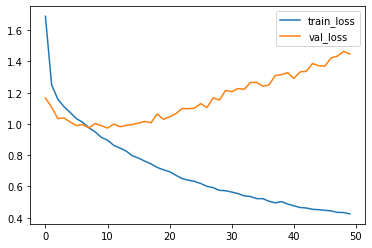

In [ ]:
plt.plot(model.history.history['loss'],label='train_loss')
plt.plot(model.history.history['val_loss'],label='val_loss')
plt.legend()